In [163]:
import math
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [107]:
tcr_columns_chain = {'TRA':['a_cdr3aa','TRAV','TRAJ'],'TRB':['b_cdr3aa','TRBV','TRBJ'],'TRA_TRB':['a_cdr3aa','TRAV','TRAJ', 'b_cdr3aa','TRBV','TRBJ']}

In [77]:
results_path = 'tcremb_outputs/example/'

In [78]:
chain = 'TRA_TRB'

In [89]:
label='antigen.epitope'

## Data desc

In [174]:
data = pd.read_csv('data/data_preped/VDJdb_data_paired_example.csv', sep='\t')

In [185]:
print(f"Unique TRA clonotypes: {len(data[tcr_columns_chain['TRA']].drop_duplicates())-1}")
print(f"Unique TRB clonotypes: {len(data[tcr_columns_chain['TRA']].drop_duplicates())-1}")
print(f"Unique paired clonotypes: {len(data[~(data['a_cdr3aa'].isna()|data['b_cdr3aa'].isna())][tcr_columns_chain['TRA'] + tcr_columns_chain['TRB']].drop_duplicates())-1}")
print(f"Number of prototypes: {len(data[label].drop_duplicates())}")
print("\n")
print('epitopes counts in only TRA subset')
print(pd.DataFrame(data[~data['a_cdr3aa'].isna()][label].value_counts()))
print("\n")
print('epitopes counts in only TRB subset')
print(pd.DataFrame(data[~data['b_cdr3aa'].isna()][label].value_counts()))
print("\n")
print('epitopes counts in paired subset')
print(pd.DataFrame(data[~(data['a_cdr3aa'].isna()|data['b_cdr3aa'].isna())][label].value_counts()))

Unique TRA clonotypes: 5238
Unique TRB clonotypes: 5238
Unique paired clonotypes: 1148
Number of prototypes: 2


epitopes counts in only TRA subset
                 count
antigen.epitope       
GILGFVFTL         3432
NLVPMVATV         2744


epitopes counts in only TRB subset
                 count
antigen.epitope       
NLVPMVATV         5256
GILGFVFTL         3908


epitopes counts in paired subset
                 count
antigen.epitope       
GILGFVFTL          852
NLVPMVATV          586


Text(0.5, 1.0, 'epitopes in paired subset')

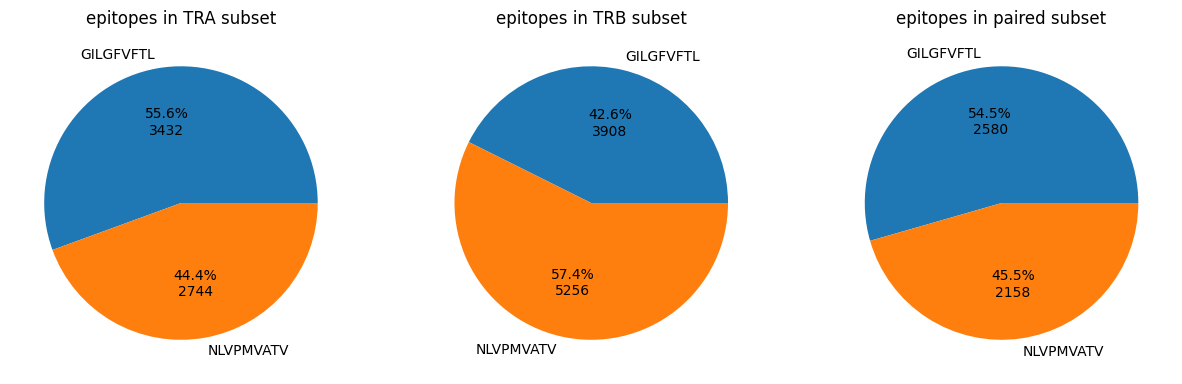

In [205]:
def absolute_func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n{absolute}"


fig, axes = plt.subplots(1,3, figsize=[15,5])
d = pd.DataFrame(data[~data['a_cdr3aa'].isna()][label].value_counts()).reset_index().sort_values(label)
axes[0].pie(d['count'], autopct=lambda pct: absolute_func(pct, d['count']), labels = d[label])
axes[0].set_title('epitopes in TRA subset')

d = pd.DataFrame(data[~data['b_cdr3aa'].isna()][label].value_counts()).reset_index().sort_values(label)
axes[1].pie(d['count'], autopct=lambda pct: absolute_func(pct, d['count']), labels = d[label])
axes[1].set_title('epitopes in TRB subset')

d = pd.DataFrame(data[~(data['a_cdr3aa'].isna()|data['b_cdr3aa'])][label].value_counts()).reset_index().sort_values(label)
axes[2].pie(d['count'], autopct=lambda pct: absolute_func(pct, d['count']), labels = d[label])
axes[2].set_title('epitopes in paired subset')

## Dists table

In [ ]:
## dennst plot with

In [92]:
dists_res = pd.read_csv(f'{results_path}tcremb_dists_{chain}.txt', sep='\t')

In [93]:
dists_res.head(10)

,id,cloneId,a_cdr3aa,TRAV,TRAJ,b_cdr3aa,TRBV,TRBJ,antigen.epitope,a_0_v,...,b_6_cdr3,b_7_v,b_7_j,b_7_cdr3,b_8_v,b_8_j,b_8_cdr3,b_9_v,b_9_j,b_9_cdr3
0,0,225,CAGAGSQGNLIF,TRAV27*01,TRAJ42*01,CASSSRSSYEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,148.0,...,-10.0,169.0,33.0,-20.0,140.0,43.0,-70.0,117.0,81.0,-30.0
1,1,225,CAGAGSQGNLIF,TRAV27*01,TRAJ42*01,CASSSRSSYEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,148.0,...,-10.0,169.0,33.0,-20.0,140.0,43.0,-70.0,117.0,81.0,-30.0
2,2,225,CAGAGSQGNLIF,TRAV27*01,TRAJ42*01,CASSSRSSYEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,148.0,...,-10.0,169.0,33.0,-20.0,140.0,43.0,-70.0,117.0,81.0,-30.0
3,3,223,CAGAGSQGNLIF,TRAV27*01,TRAJ42*01,CASSSRASYEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,148.0,...,-10.0,169.0,33.0,-30.0,140.0,43.0,-90.0,117.0,81.0,-20.0
4,4,581,CARNTGNQFYF,TRAV24*01,TRAJ49*01,CASSPVTGGIYGYTF,TRBV6-5*01,TRBJ1-2*01,NLVPMVATV,165.0,...,-70.0,145.0,25.0,-70.0,147.0,80.0,-10.0,137.0,43.0,-10.0
5,5,124,CAFITGNQFYF,TRAV24*01,TRAJ49*01,CASSQTQLWETQYF,TRBV7-2*01,TRBJ2-5*01,NLVPMVATV,165.0,...,-60.0,196.0,32.0,-20.0,294.0,28.0,-10.0,292.0,50.0,-50.0
6,6,233,CAGAIGPSNTGKLIF,TRAV27*01,TRAJ37*01,CASSIRSSYEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,148.0,...,-50.0,169.0,33.0,-40.0,140.0,43.0,-110.0,117.0,81.0,-20.0
7,7,116,CAFDTNAGKSTF,TRAV24*01,TRAJ27*01,CASSIFGQREQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,165.0,...,-80.0,169.0,33.0,-70.0,140.0,43.0,-110.0,117.0,81.0,-20.0
8,8,269,CAGATGNTGKLIF,TRAV27*01,TRAJ37*01,CASSTRGAYEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,148.0,...,-60.0,169.0,33.0,-50.0,140.0,43.0,-100.0,117.0,81.0,-20.0
9,9,225,CAGAGSQGNLIF,TRAV27*01,TRAJ42*01,CASSSRSSYEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,148.0,...,-10.0,169.0,33.0,-20.0,140.0,43.0,-70.0,117.0,81.0,-30.0


## PCA

In [ ]:
# variance explained

In [94]:
pca_res = pd.read_csv(f'{results_path}tcremb_pca_{chain}.txt', sep='\t')
pca_res.head(10)

,id,cloneId,a_cdr3aa,TRAV,TRAJ,b_cdr3aa,TRBV,TRBJ,antigen.epitope,0,...,10,11,12,13,14,15,16,17,18,19
0,0,225,CAGAGSQGNLIF,TRAV27*01,TRAJ42*01,CASSSRSSYEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,-33.885179,...,156.390352,23.398177,29.575272,-233.484998,-62.885752,125.871132,-201.422301,116.263088,-146.855648,151.721308
1,1,225,CAGAGSQGNLIF,TRAV27*01,TRAJ42*01,CASSSRSSYEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,-33.885179,...,156.390352,23.398177,29.575272,-233.484998,-62.885752,125.871132,-201.422301,116.263088,-146.855648,151.721308
2,2,225,CAGAGSQGNLIF,TRAV27*01,TRAJ42*01,CASSSRSSYEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,-33.885179,...,156.390352,23.398177,29.575272,-233.484998,-62.885752,125.871132,-201.422301,116.263088,-146.855648,151.721308
3,3,223,CAGAGSQGNLIF,TRAV27*01,TRAJ42*01,CASSSRASYEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,-47.107973,...,163.058385,13.195943,47.802439,-237.914175,-71.965731,116.992742,-178.541123,128.626976,-147.678915,151.265610
4,4,581,CARNTGNQFYF,TRAV24*01,TRAJ49*01,CASSPVTGGIYGYTF,TRBV6-5*01,TRBJ1-2*01,NLVPMVATV,108.080869,...,166.011871,54.098615,57.559071,-197.851079,-8.016458,87.857625,-277.002760,-59.127875,-159.397583,190.350156
5,5,124,CAFITGNQFYF,TRAV24*01,TRAJ49*01,CASSQTQLWETQYF,TRBV7-2*01,TRBJ2-5*01,NLVPMVATV,238.316696,...,153.496548,42.333467,122.552093,-260.903320,-65.179166,56.357955,-150.870284,13.999080,-173.114806,92.313264
6,6,233,CAGAIGPSNTGKLIF,TRAV27*01,TRAJ37*01,CASSIRSSYEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,-91.911255,...,179.016655,-44.980334,-17.334441,-256.985921,-80.622627,-19.655170,-216.240859,78.775086,-101.609942,152.045487
7,7,116,CAFDTNAGKSTF,TRAV24*01,TRAJ27*01,CASSIFGQREQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,-57.422679,...,234.181029,-28.259991,102.653278,-180.152304,-20.051505,58.052101,-138.233289,76.044379,-102.178394,194.206692
8,8,269,CAGATGNTGKLIF,TRAV27*01,TRAJ37*01,CASSTRGAYEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,-117.337682,...,207.257146,-46.968741,9.146931,-177.337359,-28.172501,22.098660,-224.509346,127.870805,-113.512212,177.986219
9,9,225,CAGAGSQGNLIF,TRAV27*01,TRAJ42*01,CASSSRSSYEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,-33.885179,...,156.390352,23.398177,29.575272,-233.484998,-62.885752,125.871132,-201.422301,116.263088,-146.855648,151.721308


## TSNE

In [95]:
tsne_res = pd.read_csv(f'{results_path}tcremb_tsne_{chain}.txt', sep='\t')
tsne_res.head(10)

,id,cloneId,a_cdr3aa,TRAV,TRAJ,b_cdr3aa,TRBV,TRBJ,antigen.epitope,DM1,DM2
0,0,225,CAGAGSQGNLIF,TRAV27*01,TRAJ42*01,CASSSRSSYEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,-17.543716,24.461018
1,1,225,CAGAGSQGNLIF,TRAV27*01,TRAJ42*01,CASSSRSSYEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,-16.365458,24.011328
2,2,225,CAGAGSQGNLIF,TRAV27*01,TRAJ42*01,CASSSRSSYEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,-18.451153,23.700321
3,3,223,CAGAGSQGNLIF,TRAV27*01,TRAJ42*01,CASSSRASYEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,-14.130805,22.205208
4,4,581,CARNTGNQFYF,TRAV24*01,TRAJ49*01,CASSPVTGGIYGYTF,TRBV6-5*01,TRBJ1-2*01,NLVPMVATV,-16.394245,48.443390
5,5,124,CAFITGNQFYF,TRAV24*01,TRAJ49*01,CASSQTQLWETQYF,TRBV7-2*01,TRBJ2-5*01,NLVPMVATV,34.588974,6.642893
6,6,233,CAGAIGPSNTGKLIF,TRAV27*01,TRAJ37*01,CASSIRSSYEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,-47.436300,-35.050050
7,7,116,CAFDTNAGKSTF,TRAV24*01,TRAJ27*01,CASSIFGQREQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,-8.778373,13.706530
8,8,269,CAGATGNTGKLIF,TRAV27*01,TRAJ37*01,CASSTRGAYEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,-36.556614,-35.484930
9,9,225,CAGAGSQGNLIF,TRAV27*01,TRAJ42*01,CASSSRSSYEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,-16.365458,24.011328


Text(0.5, 1.0, 'TSNE representation')

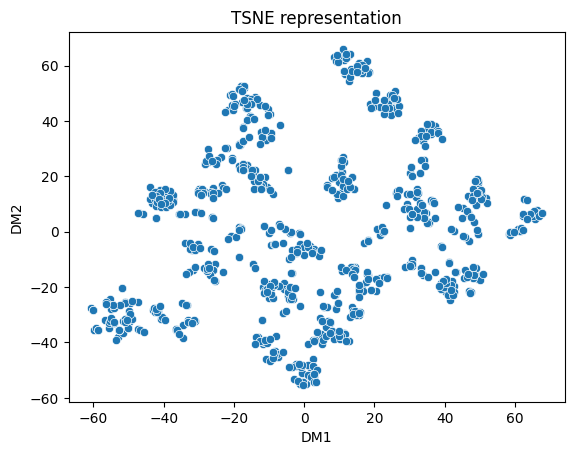

In [192]:
sns.scatterplot(x='DM1', y='DM2', data=tsne_res).set_title('TSNE representation')

Text(0.5, 1.0, 'TSNE representation colored by epitope')

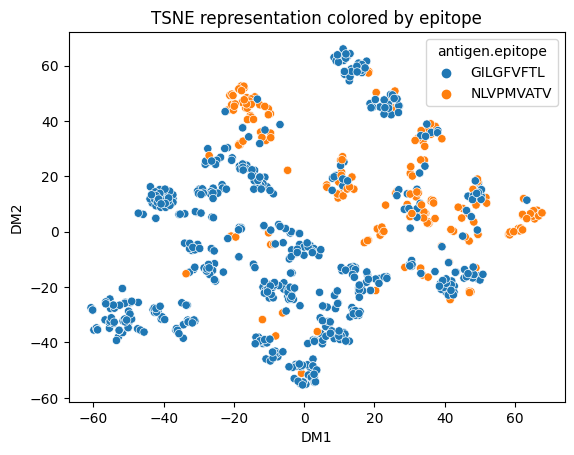

In [193]:
sns.scatterplot(x='DM1', y='DM2', data=tsne_res, hue='antigen.epitope').set_title('TSNE representation colored by epitope')

## Clusters

In [ ]:
# show elbow for eps

In [196]:
clstr_res = pd.read_csv(f'{results_path}tcremb_clstr_res_{chain}.txt', sep='\t')
clstr_res['cluster'] = clstr_res['cluster'].astype(str)
clstr_res.head(10)

,id,cloneId,a_cdr3aa,TRAV,TRAJ,b_cdr3aa,TRBV,TRBJ,antigen.epitope,cluster,label_cluster
0,0,225,CAGAGSQGNLIF,TRAV27*01,TRAJ42*01,CASSSRSSYEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,0,GILGFVFTL
1,1,225,CAGAGSQGNLIF,TRAV27*01,TRAJ42*01,CASSSRSSYEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,0,GILGFVFTL
2,2,225,CAGAGSQGNLIF,TRAV27*01,TRAJ42*01,CASSSRSSYEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,0,GILGFVFTL
3,3,223,CAGAGSQGNLIF,TRAV27*01,TRAJ42*01,CASSSRASYEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,0,GILGFVFTL
4,4,581,CARNTGNQFYF,TRAV24*01,TRAJ49*01,CASSPVTGGIYGYTF,TRBV6-5*01,TRBJ1-2*01,NLVPMVATV,1,NLVPMVATV
5,5,124,CAFITGNQFYF,TRAV24*01,TRAJ49*01,CASSQTQLWETQYF,TRBV7-2*01,TRBJ2-5*01,NLVPMVATV,2,NLVPMVATV
6,6,233,CAGAIGPSNTGKLIF,TRAV27*01,TRAJ37*01,CASSIRSSYEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,3,GILGFVFTL
7,7,116,CAFDTNAGKSTF,TRAV24*01,TRAJ27*01,CASSIFGQREQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,-1,no
8,8,269,CAGATGNTGKLIF,TRAV27*01,TRAJ37*01,CASSTRGAYEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,3,GILGFVFTL
9,9,225,CAGAGSQGNLIF,TRAV27*01,TRAJ42*01,CASSSRSSYEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,0,GILGFVFTL


Text(0.5, 1.0, 'tsne colored by cluster label')

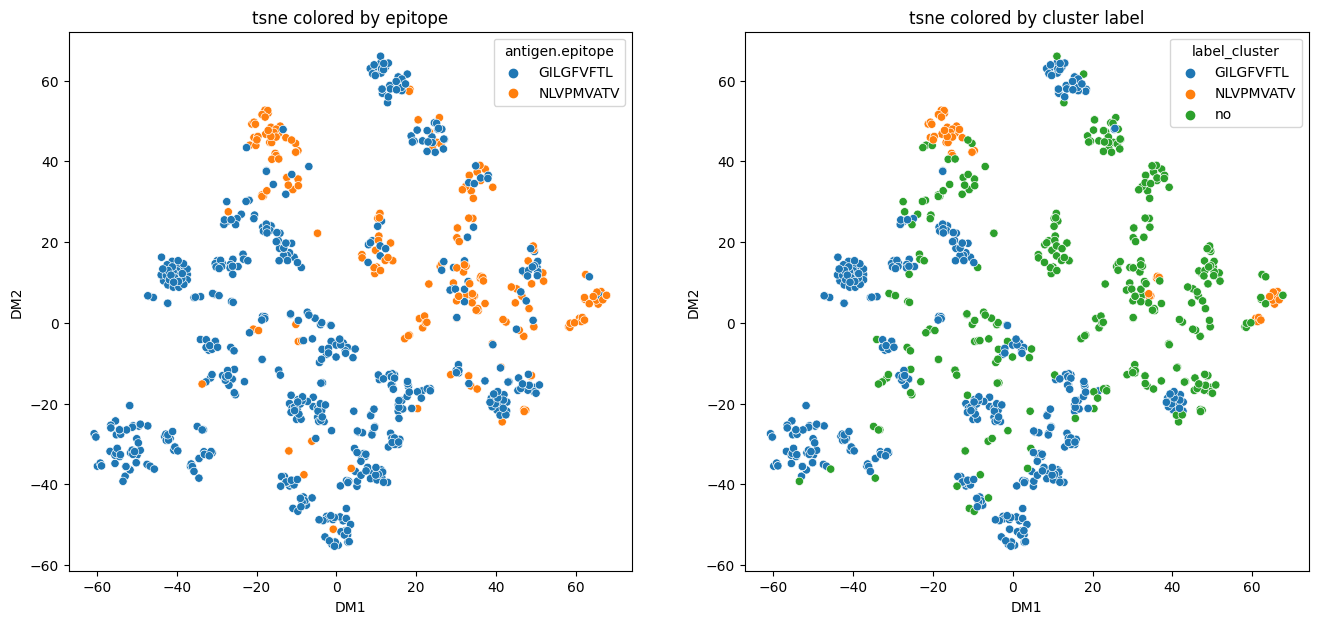

In [209]:
fig, axes = plt.subplots(1,2, figsize=[16,7])
sns.scatterplot(x='DM1', y='DM2', data=clstr_res.merge(tsne_res[['id','DM1','DM2']]), hue='antigen.epitope', ax = axes[0])
axes[0].set_title('tsne colored by epitope')
sns.scatterplot(x='DM1', y='DM2', data=clstr_res.merge(tsne_res[['id','DM1','DM2']]), hue='label_cluster', ax = axes[1])
axes[1].set_title('tsne colored by cluster label')

In [101]:
clstr_res[clstr_res['cluster']=='-1']

,id,cloneId,a_cdr3aa,TRAV,TRAJ,b_cdr3aa,TRBV,TRBJ,antigen.epitope,cluster,label_cluster
7,7,116,CAFDTNAGKSTF,TRAV24*01,TRAJ27*01,CASSIFGQREQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,-1,no
12,12,633,CATVGTASKLTF,TRAV17*01,TRAJ44*01,CASSLWLNEQFF,TRBV7-2*01,TRBJ2-1*01,NLVPMVATV,-1,no
15,15,37,CAASRKGSNYKLTF,TRAV13-1*01,TRAJ53*01,CASSADSYGANVLTF,TRBV10-1*01,TRBJ2-6*01,NLVPMVATV,-1,no
17,17,109,CAESSASKIIF,TRAV5*01,TRAJ3*01,CASSHDPTWGPGNTIYF,TRBV3-1*01,TRBJ1-3*01,NLVPMVATV,-1,no
18,18,156,CAFNRDDKIIF,TRAV24*01,TRAJ30*01,CASRRQGTVYEQYF,TRBV28*01,TRBJ2-7*01,NLVPMVATV,-1,no
...,...,...,...,...,...,...,...,...,...,...,...
782,782,624,CATENIRDDKIIF,TRAV17*01,TRAJ30*01,CSARAWDRAQATNEKLFF,TRBV20-1*01,TRBJ1-4*01,GILGFVFTL,-1,no
784,784,446,CAGVHGSGNTGKLIF,TRAV27*01,TRAJ37*01,CASSIRSAWAQHF,TRBV19*01,TRBJ1-5*01,GILGFVFTL,-1,no
788,788,658,CAVFSGSARQLTF,TRAV12-2*01,TRAJ22*01,CASSFDHSNEQFF,TRBV4-1*01,TRBJ2-1*01,GILGFVFTL,-1,no
789,789,596,CASPDVTTDSWGKFQF,TRAV24*01,TRAJ24*01,CASSIFSGRENEQYF,TRBV19*01,TRBJ2-7*01,GILGFVFTL,-1,no


<Axes: xlabel='DM1', ylabel='DM2'>

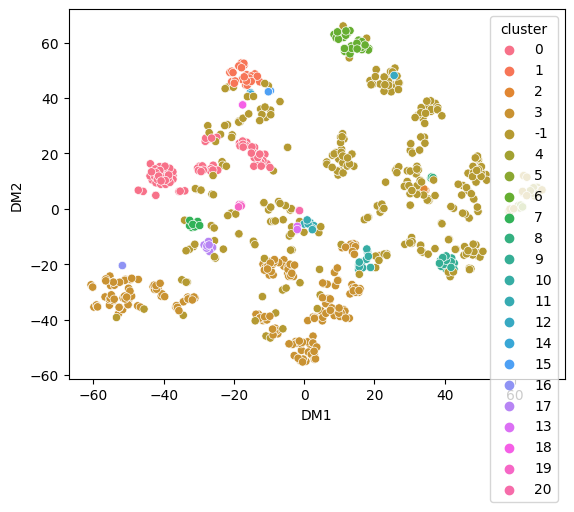

In [102]:
# remove legend , use digits 
sns.scatterplot(x='DM1', y='DM2', data=clstr_res.merge(tsne_res[['id','DM1','DM2']]), hue='cluster')

## Confusion Matrix 

In [ ]:
# with GLC will be better
# remove Nonne for True label
# Predicted not assigned

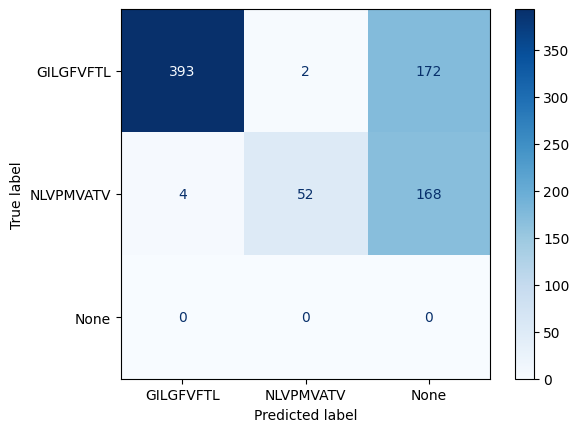

In [245]:
cm = confusion_matrix(clstr_res[label],clstr_res['label_cluster'])
ConfusionMatrixDisplay(cm,display_labels=list(clstr_res[label].drop_duplicates()) + ['None']).plot(cmap=plt.cm.Blues,values_format='g')